# 一、機器學習評估指標選定
## [教學目標]
學習 sklearn 中，各種評估指標的使用與意義

## [範例重點]
注意觀察各指標的數值範圍，以及輸入函數中的資料格式

In [ ]:
from sklearn import metrics, datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import numpy as np
%matplotlib inline

## 回歸問題
常見的評估指標有
- MAE
- MSE
- R-square

我們隨機生成(X, y)資料，然後使用線性回歸模型做預測，再使用 MAE, MSE, R-square 評估

In [ ]:
X, y = datasets.make_regression(n_features=1, random_state=42, noise=100) # 生成資料
model = LinearRegression() # 建立回歸模型
model.fit(X, y) # 將資料放進模型訓練
prediction = model.predict(X) # 進行預測
mae = metrics.mean_absolute_error(prediction, y) # 使用 MAE 評估
mse = metrics.mean_squared_error(prediction, y) # 使用 MSE 評估
r2 = metrics.r2_score(prediction, y) # 使用 r-square 評估
print("MAE: ", mae)
print("MSE: ", mse)
print("R-square: ", r2)

MAE:  71.04493131413916
MSE:  7805.425042123901
R-square:  -1.0253140168622639


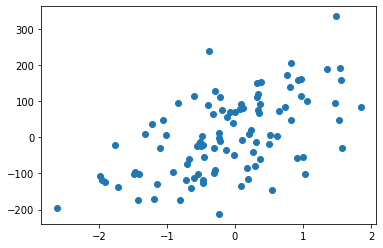

In [ ]:
plt.scatter(X,y)
plt.show()

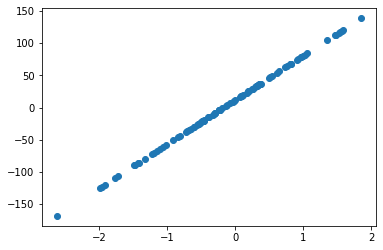

In [ ]:
plt.scatter(X, prediction)
plt.show()

## 分類問題
常見的評估指標有
- AUC
- F1-Score (Precision, Recall)

In [ ]:
cancer = datasets.load_breast_cancer() # 我們使用 sklearn 內含的乳癌資料集
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=50, random_state=0)

In [ ]:
print(y_test) # 測試集中的 label

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0]


In [ ]:
print(X_train)

[[1.917e+01 2.480e+01 1.324e+02 ... 1.767e-01 3.176e-01 1.023e-01]
 [1.486e+01 2.321e+01 1.004e+02 ... 1.727e-01 3.000e-01 8.701e-02]
 [1.845e+01 2.191e+01 1.202e+02 ... 1.379e-01 3.109e-01 7.610e-02]
 ...
 [9.436e+00 1.832e+01 5.982e+01 ... 5.052e-02 2.454e-01 8.136e-02]
 [9.720e+00 1.822e+01 6.073e+01 ... 0.000e+00 1.909e-01 6.559e-02]
 [1.151e+01 2.393e+01 7.452e+01 ... 9.653e-02 2.112e-01 8.732e-02]]


In [ ]:
y_pred = np.random.random((50,)) # 我們先隨機生成 50 筆預測值，範圍都在 0~1 之間，代表機率值

In [ ]:
print(y_pred)

[0.77683213 0.77373778 0.77804296 0.29950912 0.94387528 0.56062927
 0.10718042 0.13390547 0.03665896 0.25943002 0.0013766  0.44407213
 0.63431738 0.44027674 0.35896572 0.47906657 0.2506578  0.79182388
 0.3962983  0.22021742 0.21749773 0.57827368 0.84289637 0.46420117
 0.91417105 0.87759815 0.69771457 0.73102377 0.09313916 0.85766817
 0.51164816 0.47146952 0.68030982 0.98070245 0.98022321 0.40595784
 0.94745283 0.23329416 0.53716937 0.53902097 0.21652723 0.44794609
 0.57431763 0.73898426 0.45877354 0.29478895 0.37011018 0.92497485
 0.74846757 0.10539743]


### AUC

In [ ]:
auc = metrics.roc_auc_score(y_test, y_pred) # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc) # 得到結果約 0.5，與亂猜的結果相近，因為我們的預測值是用隨機生成的

AUC:  0.5127334465195246


## F1-Score

In [ ]:
threshold = 0.5 
y_pred_binarized = np.where(y_pred>threshold, 1, 0) # 使用 np.where 函數, 將 y_pred > 0.5 的值變為 1，小於 0.5 的為 0
f1 = metrics.f1_score(y_test, y_pred_binarized) # 使用 F1-Score 評估
precision = metrics.precision_score(y_test, y_pred_binarized) # 使用 Precision 評估
recall  = metrics.recall_score(y_test, y_pred_binarized) # 使用 recall 評估
print("F1-Score: ", f1) 
print("Precision: ", precision)
print("Recall: ", recall)

F1-Score:  0.5714285714285714
Precision:  0.64
Recall:  0.5161290322580645


## [本節重點]
了解 F1-score 的公式意義，並試著理解程式碼

## 練習
請參考 F1-score 的公式與[原始碼](https://github.com/scikit-learn/scikit-learn/blob/bac89c2/sklearn/metrics/classification.py#L620)，試著寫出 F2-Score 的計算函數

---

# 二、Regression 模型
## [教學重點]
學習使用 sklearn 中的 linear regression 模型，並理解各項參數的意義

## [範例重點]
觀察丟進模型訓練的資料格式，輸入 linear regression 與 Logistic regression 的資料有甚麼不同?

## import 需要的套件

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

### Linear regression

In [ ]:
# 讀取糖尿病資料集
diabetes = datasets.load_diabetes()

# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
X = diabetes.data[:, np.newaxis, 2]
print("Data shape: ", X.shape) # 可以看見有 442 筆資料與我們取出的其中一個 feature

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, diabetes.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

Data shape:  (442, 1)


In [ ]:
diabetes.data.shape

(442, 10)

In [ ]:
# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [934.05431907]
Mean squared error: 2569.69


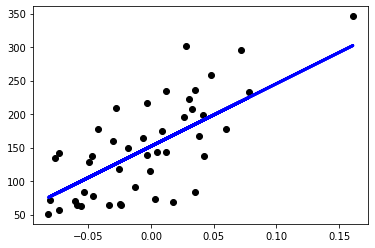

In [ ]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()

### Logistics regression

In [ ]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9333333333333333


## [練習重點]
了解其他資料集的使用方法，如何將資料正確地送進模型訓練

## 練習時間
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

In [ ]:
wine = datasets.load_wine()
boston = datasets.load_boston()
breast_cancer = datasets.load_breast_cancer()

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，再使用正確的模型訓練！

---

# 三、Lasso、Ridge Regression 模型

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 讀取糖尿病資料集
diabetes = datasets.load_diabetes()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

In [3]:
x_train.shape

(353, 10)

In [4]:
x_train[1]

array([ 0.03081083,  0.05068012, -0.03422907,  0.0436772 ,  0.05759701,
        0.06883138, -0.03235593,  0.05755657,  0.03546194,  0.08590655])

In [ ]:
y = x1*w1 + x2*w2 + .... + x10*w10 + b

In [5]:
print(regr.coef_)

[  33.40877011 -292.24672884  481.07153405  369.06269614 -966.37849405
  589.81383056  232.61924401  288.3263166   802.72704593   37.81285219]


In [6]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 2939.42


### LASSO

In [7]:
# 讀取糖尿病資料集
diabetes = datasets.load_diabetes()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
lasso = linear_model.Lasso(alpha=1.0)

# 將訓練資料丟進去模型訓練
lasso.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = lasso.predict(x_test)

In [9]:
# 印出各特徵對應的係數，可以看到許多係數都變成 0，Lasso Regression 的確可以做特徵選取
lasso.coef_

array([  0.        ,  -0.        , 321.203877  ,  57.74744332,
         0.        ,   0.        ,  -0.        ,   0.        ,
       332.41817196,   0.        ])

In [10]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 3505.84


### Ridge

In [11]:
# 讀取糖尿病資料集
diabetes = datasets.load_diabetes()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
ridge = linear_model.Ridge(alpha=10)

# 將訓練資料丟進去模型訓練
ridge.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

In [12]:
# 印出 Ridge 的參數，可以很明顯看到比起 Linear Regression，參數的數值都明顯小了許多
print(ridge.coef_)

[ 19.7381678   -2.31653333  62.15925697  49.54623554  18.92715009
  12.4573754  -39.60090964  42.81978067  61.57147383  35.24730561]


In [13]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 2939.42


可以看見 LASSO 與 Ridge 的結果並沒有比原本的線性回歸來得好，
這是因為目標函數被加上了正規化函數，讓模型不能過於複雜，相當於限制模型擬和資料的能力。因此若沒有發現 Over-fitting 的情況，是可以不需要一開始就加上太強的正規化的。

## 練習時間

請使用其他資料集 (boston, wine)，並調整不同的 alpha 來觀察模型訓練的情形。

# 四、決策樹
## [範例重點]
了解機器學習建模的步驟、資料型態以及評估結果等流程

In [14]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

## 建立模型四步驟

在 Scikit-learn 中，建立一個機器學習的模型其實非常簡單，流程大略是以下四個步驟

1. 讀進資料，並檢查資料的 shape (有多少 samples (rows), 多少 features (columns)，label 的型態是什麼？)
    - 讀取資料的方法：
        - **使用 pandas 讀取 .csv 檔：**pd.read_csv
        - **使用 numpy 讀取 .txt 檔：**np.loadtxt 
        - **使用 Scikit-learn 內建的資料集：**sklearn.datasets.load_xxx
    - **檢查資料數量：**data.shape (data should be np.array or dataframe)
2. 將資料切為訓練 (train) / 測試 (test)
    - train_test_split(data)
3. 建立模型，將資料 fit 進模型開始訓練
    - clf = DecisionTreeClassifier()
    - clf.fit(x_train, y_train)
4. 將測試資料 (features) 放進訓練好的模型中，得到 prediction，與測試資料的 label (y_test) 做評估
    - clf.predict(x_test)
    - accuracy_score(y_test, y_pred)
    - f1_score(y_test, y_pred)

In [15]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [16]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9736842105263158


In [17]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [19]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.01796599 0.         0.05992368 0.92211033]


## 練習

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

# 五、隨機森林
## [範例重點]
了解隨機森林的建模方法及其中超參數的意義

In [20]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [25]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型 (使用 20 顆樹，每棵樹的最大深度為 4)
clf = RandomForestClassifier(n_estimators=10000, max_depth=10)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [26]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
#0.9736842105263158
#0.9736842105263158

Accuracy:  0.9736842105263158


In [23]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [27]:
print("Feature importance: ", clf.feature_importances_)
#[0.06292474 0.02576675 0.40464774 0.50666078]
#[0.10037212 0.03238696 0.43257994 0.43466098]

Feature importance:  [0.10037212 0.03238696 0.43257994 0.43466098]


## 練習

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

---

# 六、梯度提升機

In [28]:
from sklearn import datasets, metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [29]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = GradientBoostingClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [30]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9736842105263158


## 練習
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次練習請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [ ]:
digits = datasets.load_digits()

In [ ]:
!python --version

Python 3.7.13


---